# Analysis of the user survey

1. Plot the Likert rating for each explanation type and question
2. Plot the Likert rating for each environment and user familiarity to the environment
3. Plot the contrastive ratings for each explanation type and question

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import TABLEAU_COLORS
from matplotlib.patches import Rectangle

In [51]:
questions = [
    "From the explanation, I understand how the agent works.",
    "This explanation of how the agent works has sufficient detail.",
    "This explanation of how the agent works is satisfying.",
    "Using the explanation, I can predict the agent's next action"
]
short_questions = [
    "Explanation Understanding",
    "Explanation Detail",
    "Explanation Satisfaction",
    "Predictability of next  action"
]
explanations = [
    "Dataset Similarity Explanation",
    "Skill Explanation",
    "Plan Explanation",
    "Grad-CAM",
    "Perturbation-based Saliency Map"
]
short_explanations = [
    "DSE",
    "SE",
    "PE",
    "Grad-CAM",
    "PBSM"
]

environments = [
    "Breakout",
    "Space Invaders",
    "Seaquest",
]
colours = list(TABLEAU_COLORS.keys())[:5]

In [52]:
# loading the survey
anonymised_user_survey = pd.read_csv("anonymised-user-info.csv")
individual_survey = pd.read_csv("individual-survey.csv")
contrastive_survey = pd.read_csv("contrastive-survey.csv")

In [53]:
anonymised_user_survey

,Survey,UserID,TimeTaken,Gender,Education,DegreeArea,StudiedAI,BreakoutKnowledge,BreakoutKnowledgeScore,SpaceInvadersKnowledge,SpaceInvadersKnowledgeScore,SeaquestKnowledge,SeaquestKnowledgeScore
0,0,2,0 days 00:10:36,Man,Bachelors,Engineering,True,Have played and understand the game well,3,Have played and understand the game well,3,Have played and understand the game well,3
1,0,3,0 days 00:15:02,Man,Masters,Engineering,False,Have played and understand the game well,3,Have played and understand the game well,3,Never played and have no idea how the game works,1
2,0,4,0 days 00:12:29,Woman,Doctorate,Engineering,True,Have played and understand the game well,3,Have played and understand the game well,3,Have played and understand the game well,3
3,0,5,0 days 08:00:16,Man,Masters,Engineering,True,Have played and understand the game well,3,Have played once or twice and have minimal kno...,2,Never played and have no idea how the game works,1
4,0,6,0 days 01:58:12,Man,Masters,Science,True,Have played once or twice and have minimal kno...,2,Have played once or twice and have minimal kno...,2,Never played and have no idea how the game works,1
5,0,7,0 days 00:26:22,Man,Masters,Engineering,True,Have played and understand the game well,3,Have played and understand the game well,3,Never played and have no idea how the game works,1
6,1,1,0 days 00:19:56,Woman,Bachelors,Business Studies,False,Never played and have no idea how the game works,1,Have played once or twice and have minimal kno...,2,Never played and have no idea how the game works,1
7,1,2,0 days 00:06:09,Man,Bachelors,Engineering,True,Have played and understand the game well,3,Have played and understand the game well,3,Never played and have no idea how the game works,1
8,1,3,0 days 00:22:27,Man,Various professional qualifications equivalent...,Engineering,True,Have played and understand the game well,3,Have played and understand the game well,3,Never played and have no idea how the game works,1
9,1,4,0 days 00:19:11,Woman,Doctorate,Engineering,True,Have played once or twice and have minimal kno...,2,Have played and understand the game well,3,Have played once or twice and have minimal kno...,2


In [54]:
individual_survey

,Survey,UserID,ExplanationType,QuestionType,QuestionNumber,Environment,Answer,LikertRating
0,1,2,Dataset Similarity Explanation,"From the explanation, I understand how the age...",0,Breakout,Strongly Agree,5
1,1,2,Dataset Similarity Explanation,This explanation of how the agent works has su...,0,Breakout,Agree,4
2,1,2,Dataset Similarity Explanation,This explanation of how the agent works is sat...,0,Breakout,Agree,4
3,1,2,Dataset Similarity Explanation,"Using the explanation, I can predict the agent...",0,Breakout,Neutral,3
4,1,2,Dataset Similarity Explanation,"From the explanation, I understand how the age...",1,SpaceInvaders,Disagree,2
...,...,...,...,...,...,...,...,...
1555,2,20,Plan Explanation,This explanation of how the agent works has su...,13,SpaceInvaders,Strongly Agree,5
1556,2,20,Plan Explanation,This explanation of how the agent works has su...,14,Seaquest,Strongly Agree,5
1557,2,20,Plan Explanation,"Using the explanation, I can predict the agent...",14,Seaquest,Strongly Agree,5
1558,2,20,Plan Explanation,This explanation of how the agent works is sat...,14,Seaquest,Strongly Agree,5


In [55]:
contrastive_survey

,Survey,UserID,QuestionType,QuestionNum,Environment,Explanation1,Explanation2,Answer,AnswerNum,OrderedExplanation1,OrderedExplanation2,OrderedAnswer,OrderedAnswerNum
0,1,2,"From the explanation, I understand how the age...",0,Breakout,Plan Explanation,Perturbation-based Saliency Map,This is more true for explanation 1 than expla...,1,Plan Explanation,Perturbation-based Saliency Map,This is more true for explanation 1 than expla...,1
1,1,2,This explanation of how the agent works has su...,0,Breakout,Plan Explanation,Perturbation-based Saliency Map,This is more true for explanation 1 than expla...,1,Plan Explanation,Perturbation-based Saliency Map,This is more true for explanation 1 than expla...,1
2,1,2,This explanation of how the agent works is sat...,0,Breakout,Plan Explanation,Perturbation-based Saliency Map,This is more true for explanation 1 than expla...,1,Plan Explanation,Perturbation-based Saliency Map,This is more true for explanation 1 than expla...,1
3,1,2,"From the explanation, I can predict the agent'...",0,Breakout,Plan Explanation,Perturbation-based Saliency Map,This is more true for explanation 1 than expla...,1,Plan Explanation,Perturbation-based Saliency Map,This is more true for explanation 1 than expla...,1
4,1,2,"From the explanation, I understand how the age...",1,Breakout,Dataset Similarity Explanation,Skill Explanation,This is equally true for explanation 1 and 2,3,Skill Explanation,Dataset Similarity Explanation,This is equally true for explanation 1 and 2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,2,20,"From the explanation, I can predict the agent'...",7,Breakout,Grad-CAM,Skill Explanation,This is more true for explanation 2 than expla...,2,Grad-CAM,Skill Explanation,This is more true for explanation 2 than expla...,2
932,2,20,"From the explanation, I understand how the age...",8,SpaceInvaders,Grad-CAM,Dataset Similarity Explanation,This is more true for explanation 1 than expla...,1,Dataset Similarity Explanation,Grad-CAM,This is more true for explanation 2 than expla...,2
933,2,20,This explanation of how the agent works has su...,8,SpaceInvaders,Grad-CAM,Dataset Similarity Explanation,This is more true for explanation 1 than expla...,1,Dataset Similarity Explanation,Grad-CAM,This is more true for explanation 2 than expla...,2
934,2,20,This explanation of how the agent works is sat...,8,SpaceInvaders,Grad-CAM,Dataset Similarity Explanation,This is more true for explanation 1 than expla...,1,Dataset Similarity Explanation,Grad-CAM,This is more true for explanation 2 than expla...,2


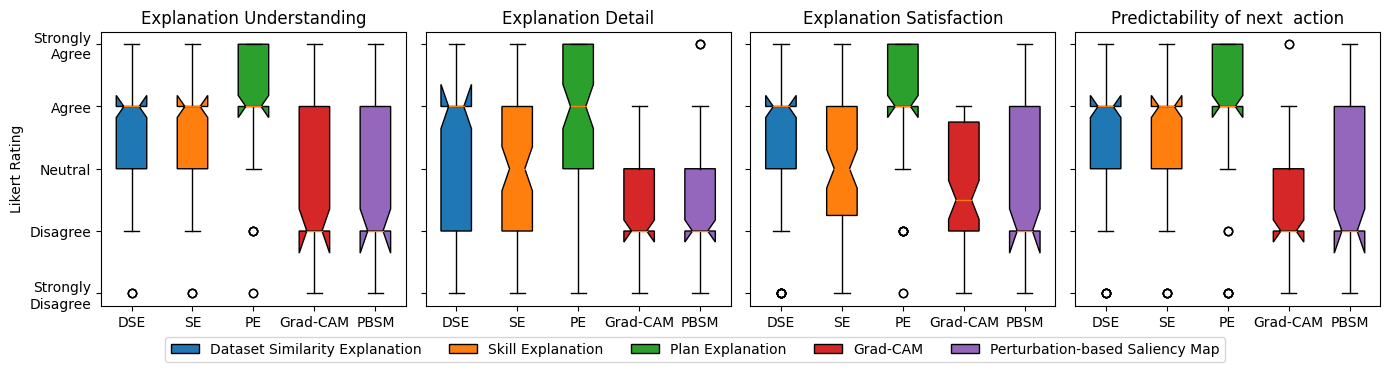

In [56]:
# Individual Explanation Ratings
fig, axs = plt.subplots(ncols=len(questions), figsize=(14, 3.5))
# fig.suptitle("Likert ratings for each question in the Individual Explanation survey", fontsize=14)

plots = []
for ax, question, short_question in zip(axs, questions, short_questions):
    ax.set_title(short_question)
    # ax.set_ylabel("Average Likert Rating")
    ax.set_yticks(np.arange(1, 6), labels=""*5)

    data = individual_survey[individual_survey["QuestionType"] == question].groupby("ExplanationType")["LikertRating"].apply(list).reindex(explanations)
    plots.append(ax.boxplot(data, labels=short_explanations, patch_artist=True, notch=True))

axs[0].set_ylabel("Likert Rating")
axs[0].set_yticks(np.arange(1, 6), labels=["Strongly\nDisagree", "Disagree", "Neutral", "Agree", "Strongly\nAgree"])
for bplot in plots:
    for patch, colour in zip(bplot['boxes'], TABLEAU_COLORS):
        patch.set_facecolor(colour)

legend = fig.legend(plots[0]["boxes"], explanations, loc="lower center", ncol=len(short_explanations),
                    bbox_to_anchor=(.5, -0.07))
        
plt.tight_layout()
plt.savefig('figs/survey/individual-evaluation.pdf',
            bbox_extra_artists=(legend,), bbox_inches='tight')
plt.savefig('figs/survey/individual-evaluation.png',
            bbox_extra_artists=(legend,), bbox_inches='tight')

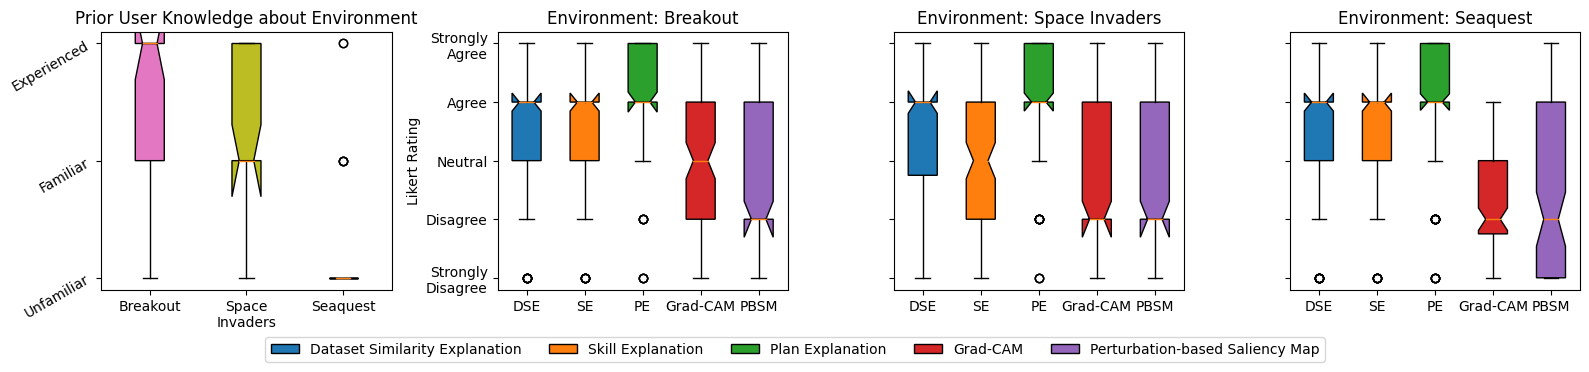

In [57]:
# Environment familiarity with explanation evaluation
fig, axs = plt.subplots(ncols=1 + len(environments), figsize=(16, 3.5))
# fig.suptitle("The Likert Rating for each Environment and Explanation Type along with familiarity.", fontsize=14)

axs[0].set_title("Prior User Knowledge about Environment")
# axs[0].set_ylabel("")
axs[0].set_yticks([1, 2, 3], labels=["Unfamiliar", "Familiar", "Experienced"], rotation=30)
data = [
    anonymised_user_survey[col]
    for col in ["BreakoutKnowledgeScore", "SpaceInvadersKnowledgeScore", "SeaquestKnowledgeScore"]
]
env_plot = axs[0].boxplot(data, labels=["Breakout", "Space\nInvaders", "Seaquest"], patch_artist=True, notch=True)

for patch, colour in zip(env_plot['boxes'], ["tab:pink", "tab:olive", "navy"]):
    patch.set_facecolor(colour)

plots = []
for i, (ax, env) in enumerate(zip(axs[1:], environments)):
    ax.set_title(f'Environment: {env}')
    ax.set_yticks(np.arange(1, 6), labels=[""] * 5)

    data = individual_survey[individual_survey["QuestionNumber"] % 3 == i].groupby("ExplanationType")["LikertRating"].apply(list).reindex(explanations)
    plots.append(ax.boxplot(data, labels=short_explanations, patch_artist=True, notch=True))

axs[1].set_ylabel("Likert Rating")
axs[1].set_yticks(np.arange(1, 6), labels=["Strongly\nDisagree", "Disagree", "Neutral", "Agree", "Strongly\nAgree"])

for bplot in plots:
    for patch, colour in zip(bplot['boxes'], TABLEAU_COLORS):
        patch.set_facecolor(colour)

legend = fig.legend(plots[0]["boxes"], explanations, loc="lower center", ncol=len(short_explanations),
                    bbox_to_anchor=(.5, -0.07))

plt.tight_layout()
plt.savefig('figs/survey/environment-individual-evaluation.pdf', bbox_extra_artists=(legend,), bbox_inches='tight')
plt.savefig('figs/survey/environment-individual-evaluation.png', bbox_extra_artists=(legend,), bbox_inches='tight')

In [58]:
contrastive_survey["QuestionType"].unique()

array(['From the explanation, I understand how the agent works.',
       'This explanation of how the agent works has sufficient detail.',
       'This explanation of how the agent works is satisfying.',
       "From the explanation, I can predict the agent's next action"],
      dtype=object)

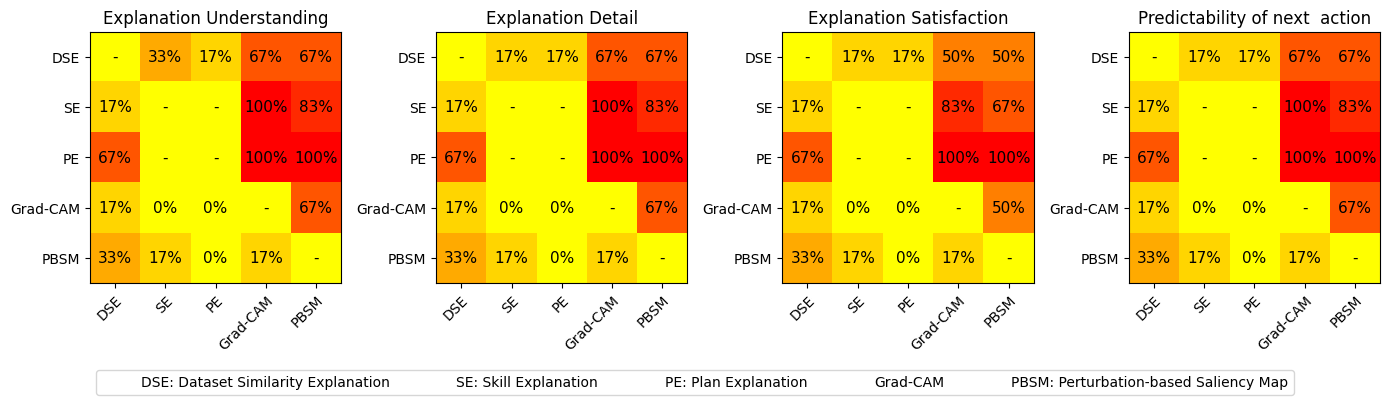

In [72]:
# Contrastive preference
fig, axs = plt.subplots(ncols=len(questions), figsize=(14, 4))
# fig.suptitle("Preference of Explanations", fontsize=14)

contrastive_questions = [
    "From the explanation, I understand how the agent works.",
    "This explanation of how the agent works has sufficient detail.",
    "This explanation of how the agent works is satisfying.",
    "From the explanation, I can predict the agent's next action",
]
for ax, question, short_question in zip(axs, contrastive_questions, short_questions):
    ax.set_title(short_question)

    preferences = np.zeros((len(short_explanations), len(short_explanations)))
    data = contrastive_survey[contrastive_survey["QuestionType"] == question].groupby(["OrderedExplanation1", "OrderedExplanation2"], group_keys=True)["OrderedAnswerNum"].apply(list)
    for (explanation_1, explanation_2), explanation_preferences in data.items():
        index_1 = explanations.index(explanation_1)
        index_2 = explanations.index(explanation_2)

        length = len(explanation_preferences)
        explanation_1_preference = sum(pref == 1 for pref in explanation_preferences) / length
        explanation_2_preference = sum(pref == 2 for pref in explanation_preferences) / length

        preferences[index_1, index_2] = explanation_1_preference
        preferences[index_2, index_1] = explanation_2_preference

    cmap = ax.imshow(preferences, cmap="autumn_r")

    # ax.xaxis.set_ticks_position('top') # the rest is the same
    ax.set_xticks(np.arange(len(short_explanations)), labels=short_explanations)
    ax.set_yticks(np.arange(len(short_explanations)), labels=short_explanations)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    for i in range(len(short_explanations)):
        for j in range(len(short_explanations)):
            if i != j and not ({i, j} == {1, 2}):
                ax.text(j, i, f'{preferences[i, j] * 100:.0f}%', ha="center", va="center", color="black", fontsize=11)
            else:
                ax.text(j, i, f'-', ha="center", va="center", color="black", fontsize=11)

r = Rectangle((0,0), 1, 1, fill=False, edgecolor='none', visible=False)
legend = fig.legend([r] * len(explanations),
                    [f'{short_explanation}: {explanation}' if short_explanation != explanation else explanation for short_explanation, explanation in zip(short_explanations, explanations)],
                    loc="lower center", ncol=len(short_explanations),bbox_to_anchor=(.5, -0.07))

# cb_ax = fig.add_axes([.91,.124,.04,.754])
# plt.colorbar(cmap)

plt.tight_layout()
plt.savefig('figs/survey/contrastive-evaluation.pdf', bbox_extra_artists=(legend,), bbox_inches='tight')
plt.savefig('figs/survey/contrastive-evaluation.png', bbox_extra_artists=(legend,), bbox_inches='tight')

In [60]:
contrastive_survey[(contrastive_survey["QuestionType"] == contrastive_questions[0])
                  ].groupby(["OrderedExplanation1", "OrderedExplanation2", "OrderedAnswer"], group_keys=True)["Answer"].count().reset_index(name="count")

,OrderedExplanation1,OrderedExplanation2,OrderedAnswer,count
0,Dataset Similarity Explanation,Grad-CAM,This is equally true for explanation 1 and 2,2
1,Dataset Similarity Explanation,Grad-CAM,This is more true for explanation 1 than expla...,3
2,Dataset Similarity Explanation,Grad-CAM,This is more true for explanation 2 than expla...,15
3,Dataset Similarity Explanation,Perturbation-based Saliency Map,This is equally true for explanation 1 and 2,2
4,Dataset Similarity Explanation,Perturbation-based Saliency Map,This is more true for explanation 1 than expla...,3
5,Dataset Similarity Explanation,Perturbation-based Saliency Map,This is more true for explanation 2 than expla...,15
6,Dataset Similarity Explanation,Plan Explanation,This is equally true for explanation 1 and 2,4
7,Dataset Similarity Explanation,Plan Explanation,This is more true for explanation 1 than expla...,13
8,Dataset Similarity Explanation,Plan Explanation,This is more true for explanation 2 than expla...,3
9,Dataset Similarity Explanation,Skill Explanation,This is equally true for explanation 1 and 2,17


# Paper values

In [61]:
anonymised_user_survey[["BreakoutKnowledgeScore", "SpaceInvadersKnowledgeScore", "SeaquestKnowledgeScore"]].mean()

BreakoutKnowledgeScore         2.538462
SpaceInvadersKnowledgeScore    2.384615
SeaquestKnowledgeScore         1.307692
dtype: float64

In [62]:
individual_survey.groupby(["ExplanationType"])["LikertRating"].mean()

ExplanationType
Dataset Similarity Explanation     3.516026
Grad-CAM                           2.512821
Perturbation-based Saliency Map    2.573718
Plan Explanation                   4.041667
Skill Explanation                  3.336538
Name: LikertRating, dtype: float64

In [63]:
individual_survey.groupby(["ExplanationType", "Environment"])["LikertRating"].agg(["mean", "var"])

mean       var
ExplanationType                 Environment                      
Dataset Similarity Explanation  Breakout       3.548077  1.298637
                                Seaquest       3.567308  1.257562
                                SpaceInvaders  3.432692  1.451736
Grad-CAM                        Breakout       2.682692  1.131348
                                Seaquest       2.240385  1.038742
                                SpaceInvaders  2.615385  1.306945
Perturbation-based Saliency Map Breakout       2.701923  1.279220
                                Seaquest       2.394231  1.464432
                                SpaceInvaders  2.625000  1.382282
Plan Explanation                Breakout       3.892857  1.060671
                                Seaquest       4.032258  1.267244
                                SpaceInvaders  4.173077  0.998880
Skill Explanation               Breakout       3.278846  1.076830
                                Seaquest       3.528846  1.008869
                                SpaceInvaders  3.201923  1.211258

In [64]:
individual_survey.groupby(["ExplanationType", "QuestionType"])["LikertRating"].agg(["mean", "var"])

mean  \
ExplanationType                 QuestionType                                                   
Dataset Similarity Explanation  From the explanation, I understand how the agen...  3.692308   
                                This explanation of how the agent works has suf...  3.320513   
                                This explanation of how the agent works is sati...  3.397436   
                                Using the explanation, I can predict the agent'...  3.653846   
Grad-CAM                        From the explanation, I understand how the agen...  2.628205   
                                This explanation of how the agent works has suf...  2.384615   
                                This explanation of how the agent works is sati...  2.602564   
                                Using the explanation, I can predict the agent'...  2.435897   
Perturbation-based Saliency Map From the explanation, I understand how the agen...  2.705128   
                                This explanation of how the agent works has suf...  2.512821   
                                This explanation of how the agent works is sati...  2.692308   
                                Using the explanation, I can predict the agent'...  2.384615   
Plan Explanation                From the explanation, I understand how the agen...  4.192308   
                                This explanation of how the agent works has suf...  3.923077   
                                This explanation of how the agent works is sati...  4.025641   
                                Using the explanation, I can predict the agent'...  4.025641   
Skill Explanation               From the explanation, I understand how the agen...  3.551282   
                                This explanation of how the agent works has suf...  3.102564   
                                This explanation of how the agent works is sati...  3.192308   
                                Using the explanation, I can predict the agent'...  3.500000   

                                                                                         var  
ExplanationType                 QuestionType                                                  
Dataset Similarity Explanation  From the explanation, I understand how the agen...  1.072927  
                                This explanation of how the agent works has suf...  1.415418  
                                This explanation of how the agent works is sati...  1.463370  
                                Using the explanation, I can predict the agent'...  1.320180  
Grad-CAM                        From the explanation, I understand how the agen...  1.275558  
                                This explanation of how the agent works has suf...  1.148851  
                                This explanation of how the agent works is sati...  1.073760  
                                Using the explanation, I can predict the agent'...  1.262071  
Perturbation-based Saliency Map From the explanation, I understand how the agen...  1.431402  
                                This explanation of how the agent works has suf...  1.266067  
                                This explanation of how the agent works is sati...  1.410589  
                                Using the explanation, I can predict the agent'...  1.408591  
Plan Explanation                From the explanation, I understand how the agen...  0.858641  
                                This explanation of how the agent works has suf...  1.266733  
                                This explanation of how the agent works is sati...  1.116217  
                                Using the explanation, I can predict the agent'...  1.272061  
Skill Explanation               From the explanation, I understand how the agen...  0.951881  
                                This explanation of how the agent works has suf...  1.106227  
                                This explanation of how the agent works is 

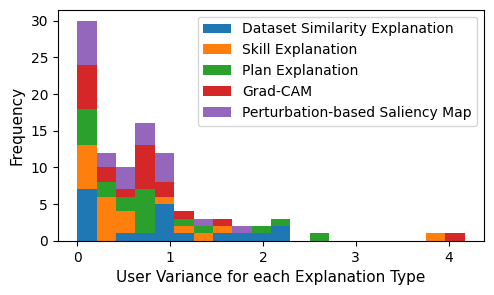

In [65]:
fig, ax = plt.subplots(figsize=(5.5, 3))

data = individual_survey.groupby(["UserID", "ExplanationType"])["LikertRating"].agg(["var"])\
    .groupby("ExplanationType")["var"].apply(list).sort_index(key=lambda _: explanations)
ax.hist(data, stacked=True, label=explanations, bins=20)
ax.set_xlabel("User Variance for each Explanation Type", fontsize=11)
ax.set_ylabel("Frequency", fontsize=11)
ax.legend()

plt.savefig('figs/survey/explanation-variances.png')
plt.savefig('figs/survey/explanation-variances.pdf')